In [35]:
import numpy as np
from LoCo_algorithm import *
from DAG import *
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#range of nodes
node_range = np.arange(2,16)

#range of connectivity
con_range = np.arange(0.1,1.1,0.1)

#number of repetitions
num_reps = 3

#number of samples used when finding variance etc.
n_samp = 3000

In [37]:
stand_mean = np.zeros((len(node_range), len(con_range)))
stand_std = np.zeros((len(node_range), len(con_range)))

flipmin_mean = np.zeros((len(node_range), len(con_range)))
flipmin_std = np.zeros((len(node_range), len(con_range)))

flipmax_mean = np.zeros((len(node_range), len(con_range)))
flipmax_std = np.zeros((len(node_range), len(con_range)))

flipvarsort_mean = np.zeros((len(node_range), len(con_range)))
flipvarsort_std = np.zeros((len(node_range), len(con_range)))

In [38]:
print('Starting on standard and flipmin \n')

for i,node_number in enumerate(node_range):
    print(f'Starting on node number: {node_number}')
    for j,con in enumerate(con_range):
        stand_varsort_lst = []
        flipmin_varsort_lst =[]
        for reps in range(num_reps):
            dag = DAG(n = node_number, roots=1, precalculate_paths=False, integer=False, connectivity=con)
            stand_varsort_lst.append( dag.get_varsortability(smart=True , N=10000)['smart'] )

            _, new_varsort = run_loco(dag, update_by_varsort=False, maximize_top_n=None ,
                                       VERBOSE=False, check_ways=False, flip_up_to=None, N=n_samp)
            flipmin_varsort_lst.append(new_varsort)

        stand_mean[i,j] = np.array(stand_varsort_lst).mean()
        stand_std[i,j] = np.array(stand_varsort_lst).std()

        flipmin_mean[i,j] = np.array(flipmin_varsort_lst).mean()
        flipmin_std[i,j] = np.array(flipmin_varsort_lst).std()

print('\n')

Starting on standard and flipmin 

Starting on node number: 2
Starting on node number: 3
Starting on node number: 4
Starting on node number: 5
Starting on node number: 6
Starting on node number: 7




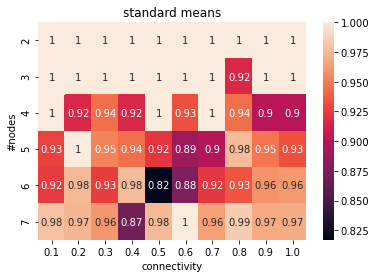

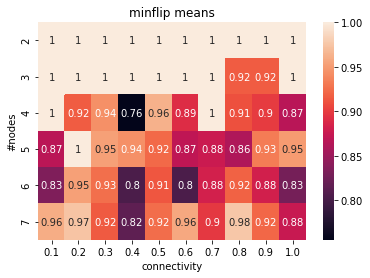

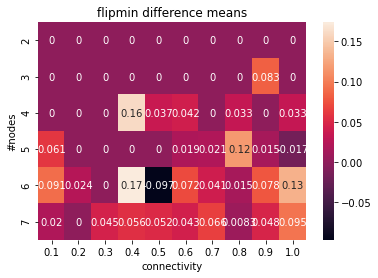

In [39]:
ax = sns.heatmap(stand_mean, annot=True)
ax.set_ylabel('#nodes')
ax.set_yticklabels(node_range)
ax.set_xlabel('connectivity')
ax.set_xticklabels(con_range.round(1))
ax.set_title('standard means')
plt.show()

ax = sns.heatmap(flipmin_mean, annot=True)
ax.set_ylabel('#nodes')
ax.set_yticklabels(node_range)
ax.set_xlabel('connectivity')
ax.set_xticklabels(con_range.round(1))
ax.set_title('minflip means')
plt.show()

ax = sns.heatmap(stand_mean - flipmin_mean, annot=True)
ax.set_ylabel('#nodes')
ax.set_yticklabels(node_range)
ax.set_xlabel('connectivity')
ax.set_xticklabels(con_range.round(1))
ax.set_title('flipmin difference means')
plt.show()



In [40]:
print('Starting on flipmax \n')

for i,node_number in enumerate(node_range):
    print(f'Starting on node number: {node_number}')
    for j,con in enumerate(con_range):
        flipmax_varsort_lst =[]
        for reps in range(num_reps):
            dag = DAG(n = node_number, roots=1, precalculate_paths=False, integer=False, connectivity=con)
            stand_varsort_lst.append( dag.get_varsortability(smart=True , N=10000) )

            _, new_varsort = run_loco(dag, update_by_varsort=False, maximize_top_n=(node_number // 3) + 1 ,
                                       VERBOSE=False, check_ways=False, flip_up_to=None, N=n_samp)
            flipmax_varsort_lst.append(new_varsort)

        flipmax_mean[i,j] = np.array(flipmax_varsort_lst).mean()
        flipmax_std[i,j] = np.array(flipmax_varsort_lst).std()
    
print('\n')

Starting on flipmax 

Starting on node number: 2
Starting on node number: 3
Starting on node number: 4
Starting on node number: 5
Starting on node number: 6
Starting on node number: 7




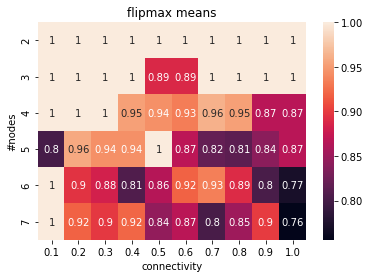

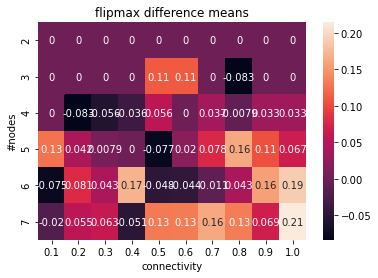

In [41]:
ax = sns.heatmap(flipmax_mean, annot=True)
ax.set_ylabel('#nodes')
ax.set_yticklabels(node_range)
ax.set_xlabel('connectivity')
ax.set_xticklabels(con_range.round(1))
ax.set_title('flipmax means')
plt.show()

ax = sns.heatmap(stand_mean - flipmax_mean, annot=True)
ax.set_ylabel('#nodes')
ax.set_yticklabels(node_range)
ax.set_xlabel('connectivity')
ax.set_xticklabels(con_range.round(1))
ax.set_title('flipmax difference means')
plt.show()


In [42]:
print('Starting on varsort update \n')

for i,node_number in enumerate(node_range):
    print(f'Starting on node number: {node_number}')
    for j,con in enumerate(con_range):
        flipvarsort_lst =[]
        for reps in range(num_reps):
            dag = DAG(n = node_number, roots=1, precalculate_paths=False, integer=False, connectivity=con)
            stand_varsort_lst.append( dag.get_varsortability(smart=True , N=10000) )

            _, new_varsort = run_loco(dag, update_by_varsort=True, maximize_top_n=None ,
                                       VERBOSE=False, check_ways=False, flip_up_to=None, N=n_samp)
            flipvarsort_lst.append(new_varsort)

        flipvarsort_mean[i,j] = np.array(flipvarsort_lst).mean()
        flipmax_std[i,j] = np.array(flipvarsort_lst).std()

Starting on varsort update 

Starting on node number: 2
Starting on node number: 3
Starting on node number: 4
Starting on node number: 5
Starting on node number: 6
Starting on node number: 7


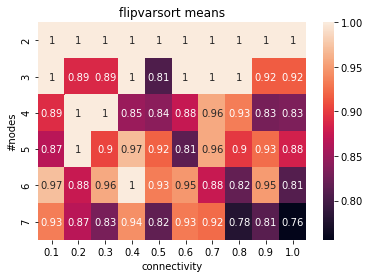

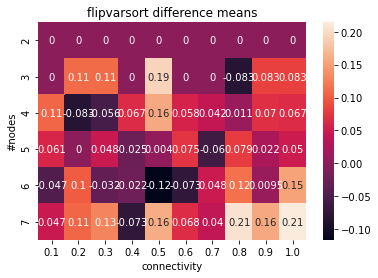

In [43]:
ax = sns.heatmap(flipvarsort_mean, annot=True)
ax.set_ylabel('#nodes')
ax.set_yticklabels(node_range)
ax.set_xlabel('connectivity')
ax.set_xticklabels(con_range.round(1))
ax.set_title('flipvarsort means')
plt.show()

ax = sns.heatmap(stand_mean - flipvarsort_mean, annot=True)
ax.set_ylabel('#nodes')
ax.set_yticklabels(node_range)
ax.set_xlabel('connectivity')
ax.set_xticklabels(con_range.round(1))
ax.set_title('flipvarsort difference means')
plt.show()


In [44]:
np.savetxt('stand_mean.txt', stand_mean)
np.savetxt('stand_std.txt', stand_std)

np.savetxt('flipmin_mean.txt', flipmin_mean)
np.savetxt('flipmin_std.txt', flipmin_std)

np.savetxt('flipmax_mean.txt', flipmax_mean)
np.savetxt('flipmax_std.txt', flipmax_std)

np.savetxt('flipvarsort_mean.txt', flipvarsort_mean)
np.savetxt('flipvarsort_std.txt', flipvarsort_std)